## Train an Un-Supervised Random cut forest model using the data stored in feature store

#### Setting up Sagemaker and feature store session

In [1]:
# importing all the required libraries
import boto3
import sagemaker
from sagemaker.session import Session

#fetching the session region
region = boto3.Session().region_name

# creating a boto session
boto_session = boto3.Session(region_name=region)

# creating sagemaker and feature store sessions
sagemaker_client = boto_session.client(service_name='sagemaker', region_name=region)
featurestore_runtime = boto_session.client(service_name='sagemaker-featurestore-runtime', region_name=region)

feature_store_session = Session(
    boto_session=boto_session,
    sagemaker_client=sagemaker_client,
    sagemaker_featurestore_runtime_client=featurestore_runtime
)

#### getting the feature group 

In [2]:
%store -r

In [3]:
from sagemaker.feature_store.feature_group import FeatureGroup

# Fetching data from feature group
fd_feature_group_name = 'transactionfeaturegroup'
fd_feature_group = FeatureGroup(name=fd_feature_group_name, sagemaker_session=feature_store_session)

## setting up the Training Dataset


In [4]:
# using the defualt bucket
default_s3_bucket_name = feature_store_session.default_bucket()
prefix = 'sagemaker-featurestore'

print(default_s3_bucket_name)

sagemaker-ap-south-1-080451317723


In [5]:
# running athena query to get all the data from the feature group tables
transaction_query = fd_feature_group.athena_query()

transaction_table = transaction_query.table_name

print(transaction_table)

query_string = 'SELECT * FROM "'+transaction_table+'"'
print('Running ' + query_string)

# running the query and storing the results into data set variable as pandas dataframe
transaction_query.run(query_string=query_string, output_location='s3://'+default_s3_bucket_name+'/'+prefix+'/query_results/')
transaction_query.wait()
dataset = transaction_query.as_dataframe()

dataset

transactionfeaturegroup-1639487824
Running SELECT * FROM "transactionfeaturegroup-1639487824"


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v26,v27,v28,amount,class,event_time,record_id,write_time,api_invocation_time,is_deleted
0,151287.0,0.088863,0.729612,-0.366984,-0.731235,1.604282,0.720851,0.896757,0.155347,0.183897,...,0.183513,0.105804,-0.150822,9.27,0,1.639488e+09,242005,2021-12-14 13:28:21.042,2021-12-14 13:22:51.000,False
1,40667.0,1.355078,-0.724511,1.368546,-0.626317,-1.727245,-0.514134,-1.291331,0.010314,-0.250836,...,-0.044516,0.061437,0.034151,9.99,0,1.639488e+09,41408,2021-12-14 13:28:21.042,2021-12-14 13:22:51.000,False
2,124341.0,0.084587,1.026924,-0.211915,-0.437726,0.767183,-1.021523,0.973648,-0.126873,-0.117500,...,0.088517,0.226348,0.089582,4.49,0,1.639488e+09,180015,2021-12-14 13:28:21.042,2021-12-14 13:22:52.000,False
3,72605.0,1.106382,-0.182073,-1.692983,-1.465153,0.525804,-1.657673,1.336612,-0.626055,-0.168914,...,0.488529,-0.094244,-0.018595,128.81,0,1.639488e+09,112310,2021-12-14 13:28:21.042,2021-12-14 13:22:52.000,False
4,72347.0,-1.177816,1.316669,1.057519,1.570301,0.717973,-1.039204,0.806413,0.251177,-1.823729,...,-0.009782,-0.206820,-0.162201,6.05,0,1.639488e+09,111742,2021-12-14 13:28:21.042,2021-12-14 13:22:52.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,125409.0,2.010149,0.093008,-1.612224,0.337610,0.405446,-0.576773,0.062787,-0.067284,0.241324,...,0.148692,-0.064047,-0.039637,1.98,0,1.639488e+09,182465,2021-12-14 13:27:51.927,2021-12-14 13:23:13.000,False
99996,61555.0,-1.786858,2.220376,-0.354501,-0.114401,-0.535980,-0.685306,-0.326123,1.226695,-0.590223,...,0.137403,0.097970,0.008434,11.99,0,1.639488e+09,87146,2021-12-14 13:27:51.927,2021-12-14 13:23:13.000,False
99997,74192.0,-0.565672,1.352774,0.937847,0.861238,0.063604,-0.343165,0.398966,0.365444,-0.916404,...,-0.304634,0.070989,0.099293,1.50,0,1.639488e+09,116232,2021-12-14 13:27:51.927,2021-12-14 13:23:13.000,False
99998,21846.0,-1.396917,-0.649990,1.450089,-1.704585,-2.496589,1.599768,1.568052,-0.189034,0.630655,...,-0.054341,0.391464,-0.031456,544.01,0,1.639488e+09,12456,2021-12-14 13:27:51.927,2021-12-14 13:23:13.000,False


In [6]:
# selecting the useful columns for our dataset
dataset = dataset[['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class']]


In [7]:
# dropping all the NANs
dataset = dataset.dropna()

In [8]:
# finding out the total number of cases by classes
nonfrauds, frauds = dataset.groupby('class').size()
print('Number of frauds: ', frauds)
print('Number of non-frauds: ', nonfrauds)
print('Percentage of fradulent data:', 100.*frauds/(frauds + nonfrauds))

Number of frauds:  172
Number of non-frauds:  99828
Percentage of fradulent data: 0.172


In [9]:
#segregating the feature and label columns
feature_columns = dataset.columns[:-1]
label_column = dataset.columns[-1]

# storing the columns separately
features = dataset[feature_columns].values.astype('float32')
labels = (dataset[label_column].values).astype('float32')

In [10]:
from sklearn.model_selection import train_test_split
# dividing the data into test and train splits
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.1, random_state=42)



## Training the data


In [11]:
import os
import sagemaker
# creating the sagemaker sessions
session = sagemaker.Session()
bucket = default_s3_bucket_name
prefix = 'rcf-fraud-classifier'

In [12]:
# fetching the IAM role
sagemaker_iam_role = sagemaker.get_execution_role()

In [13]:
from sagemaker import RandomCutForest

# initialising the parameters for the training job
rcf = RandomCutForest(role=sagemaker_iam_role,
                      instance_count=1,
                      instance_type="ml.m5.xlarge",
                      data_location='s3://{}/{}/'.format(bucket, prefix),
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      base_job_name="{}-rcf".format("fraud-detection"),
                      num_samples_per_tree=512,
                      num_trees=50)

In [14]:
# fitting out data to the model
rcf.fit(rcf.record_set(X_train))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-12-14 17:01:52 Starting - Starting the training job...
2021-12-14 17:01:54 Starting - Launching requested ML instancesProfilerReport-1639501312: InProgress
...
2021-12-14 17:02:43 Starting - Preparing the instances for training......
2021-12-14 17:03:47 Downloading - Downloading input data
2021-12-14 17:03:47 Training - Downloading the training image...
2021-12-14 17:04:22 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[12/14/2021 17:04:24 INFO 139672757847872] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'num_samples_per_tree': 256, 'num_trees': 100, 'force_dense': 'true', 'eval_metrics': ['accuracy', 'precision_recall_fscore'], 'epochs': 1, 'mini_batch_size': 1000, '_log_level': 'info', '_kvstore': 'dist_async', '_num_kv_servers': 'auto', '_num_gpus': 'auto', '_tuning_objective_metric': '', '_

### Deploying the model


In [15]:
# deploying the model to be used for inferences 
rcf_predictor = rcf.deploy(
    model_name="{}-rcf".format("fraud-detection"),
    endpoint_name="{}-rcf".format("fraud-detection"),
    initial_instance_count=1,
    instance_type="ml.c5.xlarge")

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-----!

In [16]:
from sagemaker.predictor import CSVSerializer,JSONDeserializer

rcf_predictor.serializer = CSVSerializer()
rcf_predictor.deserializer = JSONDeserializer()

### Testing the model

In [17]:
# predicting the model , data splitted into small batches
def predict_rcf(current_predictor, data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = []
    for array in split_array:
        array_preds = [s['score'] for s in current_predictor.predict(array)['scores']]
        predictions.append(array_preds)

    return np.concatenate([np.array(batch) for batch in predictions])

In [18]:
import numpy as np

positives = X_test[y_test == 1]
positives_scores = predict_rcf(rcf_predictor, positives)

negatives = X_test[y_test == 0]
negatives_scores = predict_rcf(rcf_predictor, negatives)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

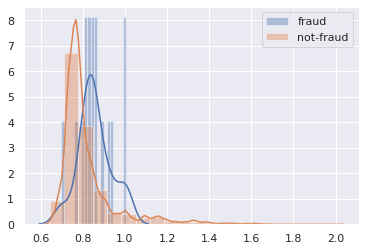

In [20]:
# plotting the positives and negatives as predicted by the model
sns.distplot(positives_scores, label='fraud', bins=20)
sns.distplot(negatives_scores, label='not-fraud', bins=20)
plt.legend()